<a href="https://colab.research.google.com/github/xahram/websmassessment_notebook/blob/master/assessemt_web.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!wget https://snap.stanford.edu/data/twitter.tar.gz
!tar xf twitter.tar.gz



--2022-03-26 17:03:55--  https://snap.stanford.edu/data/twitter.tar.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22339604 (21M) [application/x-gzip]
Saving to: ‘twitter.tar.gz’

twitter.tar.gz      100%[===================>]  21.30M  6.80MB/s    in 3.1s    

2022-03-26 17:03:58 (6.80 MB/s) - ‘twitter.tar.gz’ saved [22339604/22339604]



In [3]:
!pip install networkx

Graph with 226 nodes and 3634 edges


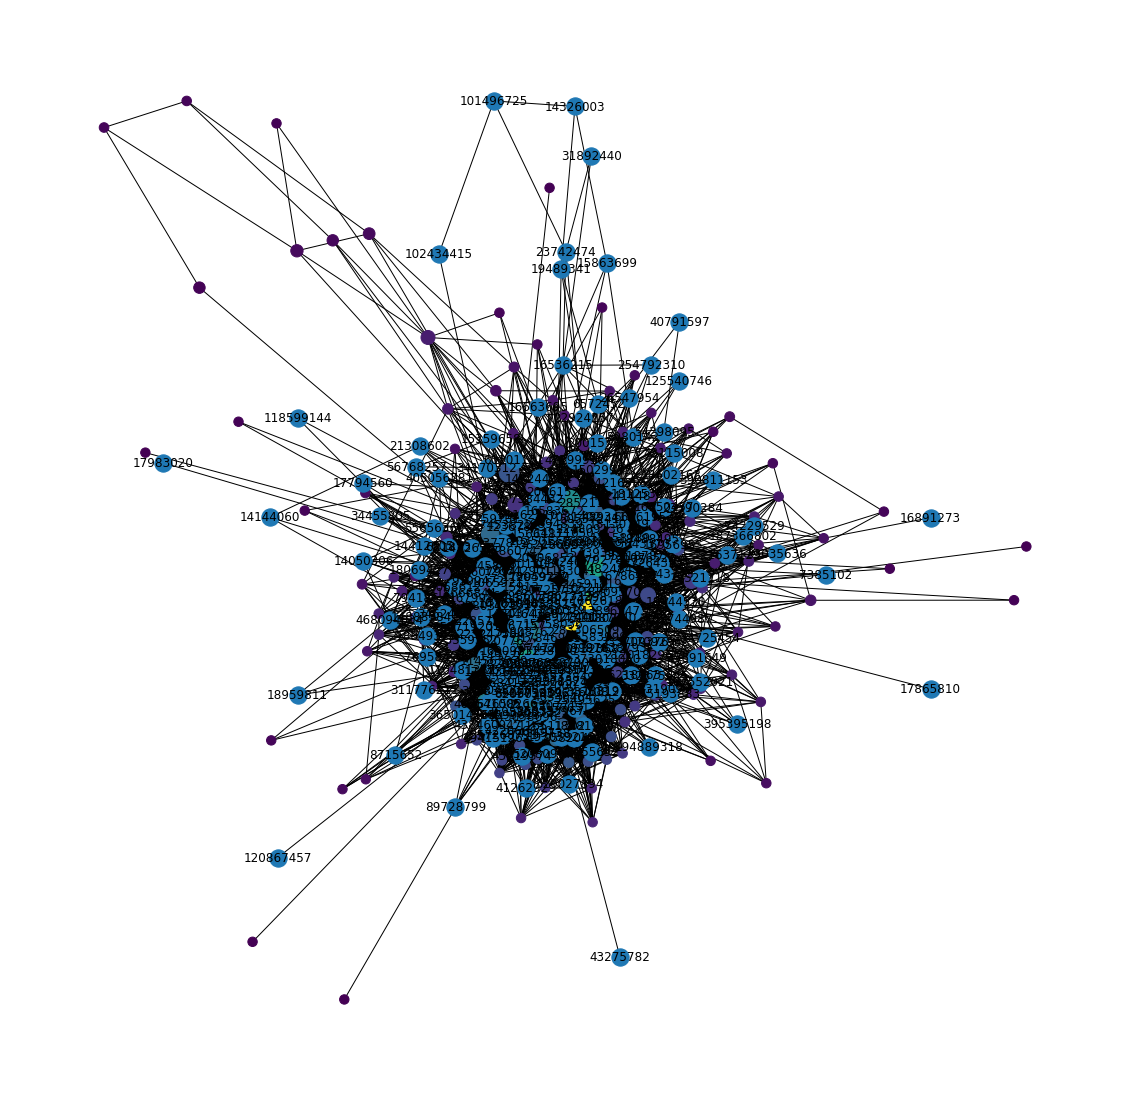

In [6]:
from pathlib import Path
import networkx as nx
import matplotlib.pyplot as plt

path_to_facebook_data = Path() / "/content/twitter/102903198.edges"

G_fb = nx.read_edgelist(path_to_facebook_data, create_using=nx.Graph, nodetype=int) 

print(nx.info(G_fb))


nx.spring_layout(G_fb)

pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size = [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos = pos,
    with_labels=False, node_color=node_color, node_size=node_size)
plt.axis("off")



nx.draw_networkx(G_fb)

In [ ]:

nx.shortest_path(G_fb)



In [15]:
Twitter_nodes = list(G_fb.nodes)

nx.shortest_path(G_fb, Twitter_nodes[1], Twitter_nodes[-1])
nx.shortest_path_length(G_fb, Twitter_nodes[1], Twitter_nodes[-1])

3

In [9]:
!pip install cdlib

     |████████████████████████████████| 228 kB 5.2 MB/s 
     |████████████████████████████████| 2.6 MB 52.6 MB/s 
     |████████████████████████████████| 14.2 MB 48.1 MB/s 
     |████████████████████████████████| 50 kB 5.6 MB/s 
     |████████████████████████████████| 3.1 MB 38.7 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=0827879d36889e6329931b4d787d7c355d4061cb73cb22355001ee74fac2959c
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149862 sha256=13b3a8b03c9728a5c6e796cbb2bf4be7d3e6bfa780bd7df0cd3c71df83a4c126
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built pyclustering python-Levenshtein


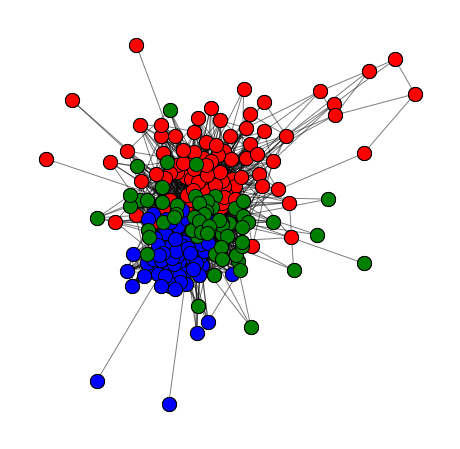

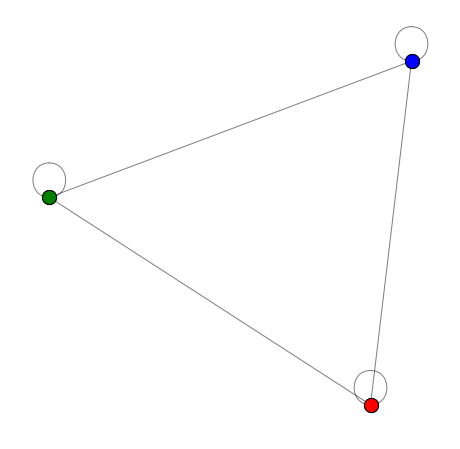

In [14]:
from cdlib import algorithms, viz

import networkx as nx
from pathlib import Path

path_to_facebook_data = Path() / "/content/twitter/102903198.edges"
G_fb = nx.read_edgelist(path_to_facebook_data, create_using=nx.Graph, nodetype=int)

coms = algorithms.louvain(G_fb, weight="weight",resolution=1.)

pos = nx.spring_layout(G_fb)

viz.plot_network_clusters(G_fb,coms,pos)

viz.plot_community_graph(G_fb, coms)


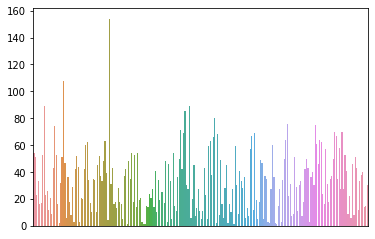

NodeView((32032000, 19507713, 16583672, 35918787, 20803125, 311776211, 16079941, 7861312, 7860742, 9955652, 462541005, 20747741, 17047105, 23559552, 20106852, 51246108, 20637608, 434725454, 18927441, 18666844, 15666380, 365014160, 21158690, 15271920, 16786977, 373018050, 369586333, 96747353, 16799897, 51162310, 18130749, 317846921, 130897520, 363426409, 438460947, 58714972, 16663695, 47799910, 31808762, 14888584, 315338495, 352226153, 300599613, 16909832, 167744987, 362286999, 126099878, 422066630, 191638793, 16038438, 390811153, 794186, 394216985, 17105214, 126042901, 7384432, 95820486, 62050341, 15343773, 19049747, 167010482, 60101131, 299715714, 7079062, 88501703, 18069427, 405323682, 404376053, 193059216, 20747847, 7377812, 172959279, 15439395, 14824849, 110481357, 212018296, 15661871, 17092862, 224809136, 223247584, 14111650, 14589257, 310087940, 18501326, 243058696, 18781900, 306472866, 344334227, 7453822, 357268791, 8207762, 308324295, 16894839, 280725732, 26841335, 16218063, 46

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

degree_of_twitter_nodes = dict(G_fb.degree())

degrees = [G_fb.degree(n) for n in G_fb.nodes()]
nodes = [n for n in G_fb.nodes()]

sns.barplot(x=nodes, y=degrees)
plt.xticks([])
plt.show()
G_fb.nodes()


(-1.1968919667024127,
 1.0720535543444378,
 -1.0206360508139265,
 1.101234094281478)

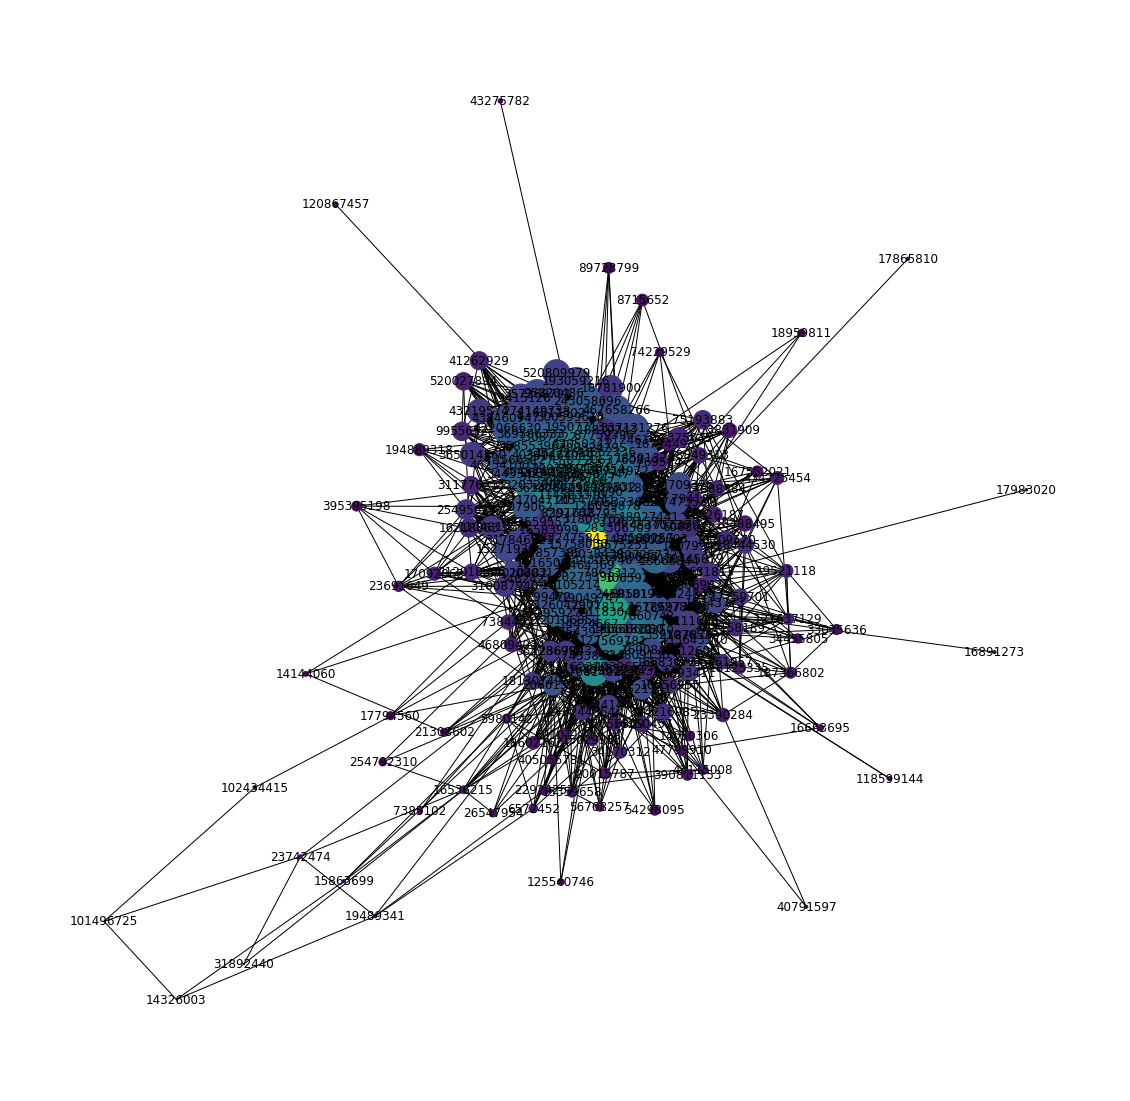

In [34]:
######### EIGEN CENTRALITY



nx.spring_layout(G_fb)

pos = nx.spring_layout(G_fb)
eigen_centrality = nx.eigenvector_centrality(G_fb)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size = [v * 10000 for v in eigen_centrality.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos = pos,
    with_labels=False, node_color=node_color, node_size=node_size)
plt.axis("off")


In [26]:
nx.clustering(G_fb)

{10350: 0.31236897274633124,
 15913: 0.33725490196078434,
 681813: 0.3241106719367589,
 756379: 0.4943181818181818,
 769584: 0.5333333333333333,
 794186: 0.4632352941176471,
 1065921: 0.32801161103047893,
 1183041: 0.21807967313585291,
 3462421: 0.3794466403162055,
 4893411: 0.46153846153846156,
 5980142: 0.30303030303030304,
 6068612: 0.3904761904761905,
 6572452: 0.4444444444444444,
 7079062: 0.43521594684385384,
 7081402: 0.25509070714550164,
 7377812: 0.31712626995645865,
 7384432: 0.31666666666666665,
 7385102: 0,
 7453822: 0.40725806451612906,
 7860742: 0.35294117647058826,
 7861312: 0.24177916233991,
 8207762: 0.5559666975023126,
 8715652: 0.8,
 9199472: 0.30158730158730157,
 9955652: 0.6209150326797386,
 14050306: 0.7142857142857143,
 14111650: 0.41625615763546797,
 14144060: 0.3333333333333333,
 14165096: 0.41114982578397213,
 14303746: 0.30015082956259426,
 14311802: 0.42177589852008457,
 14326003: 0,
 14326533: 0.43333333333333335,
 14412605: 0.33157894736842103,
 14424667: 